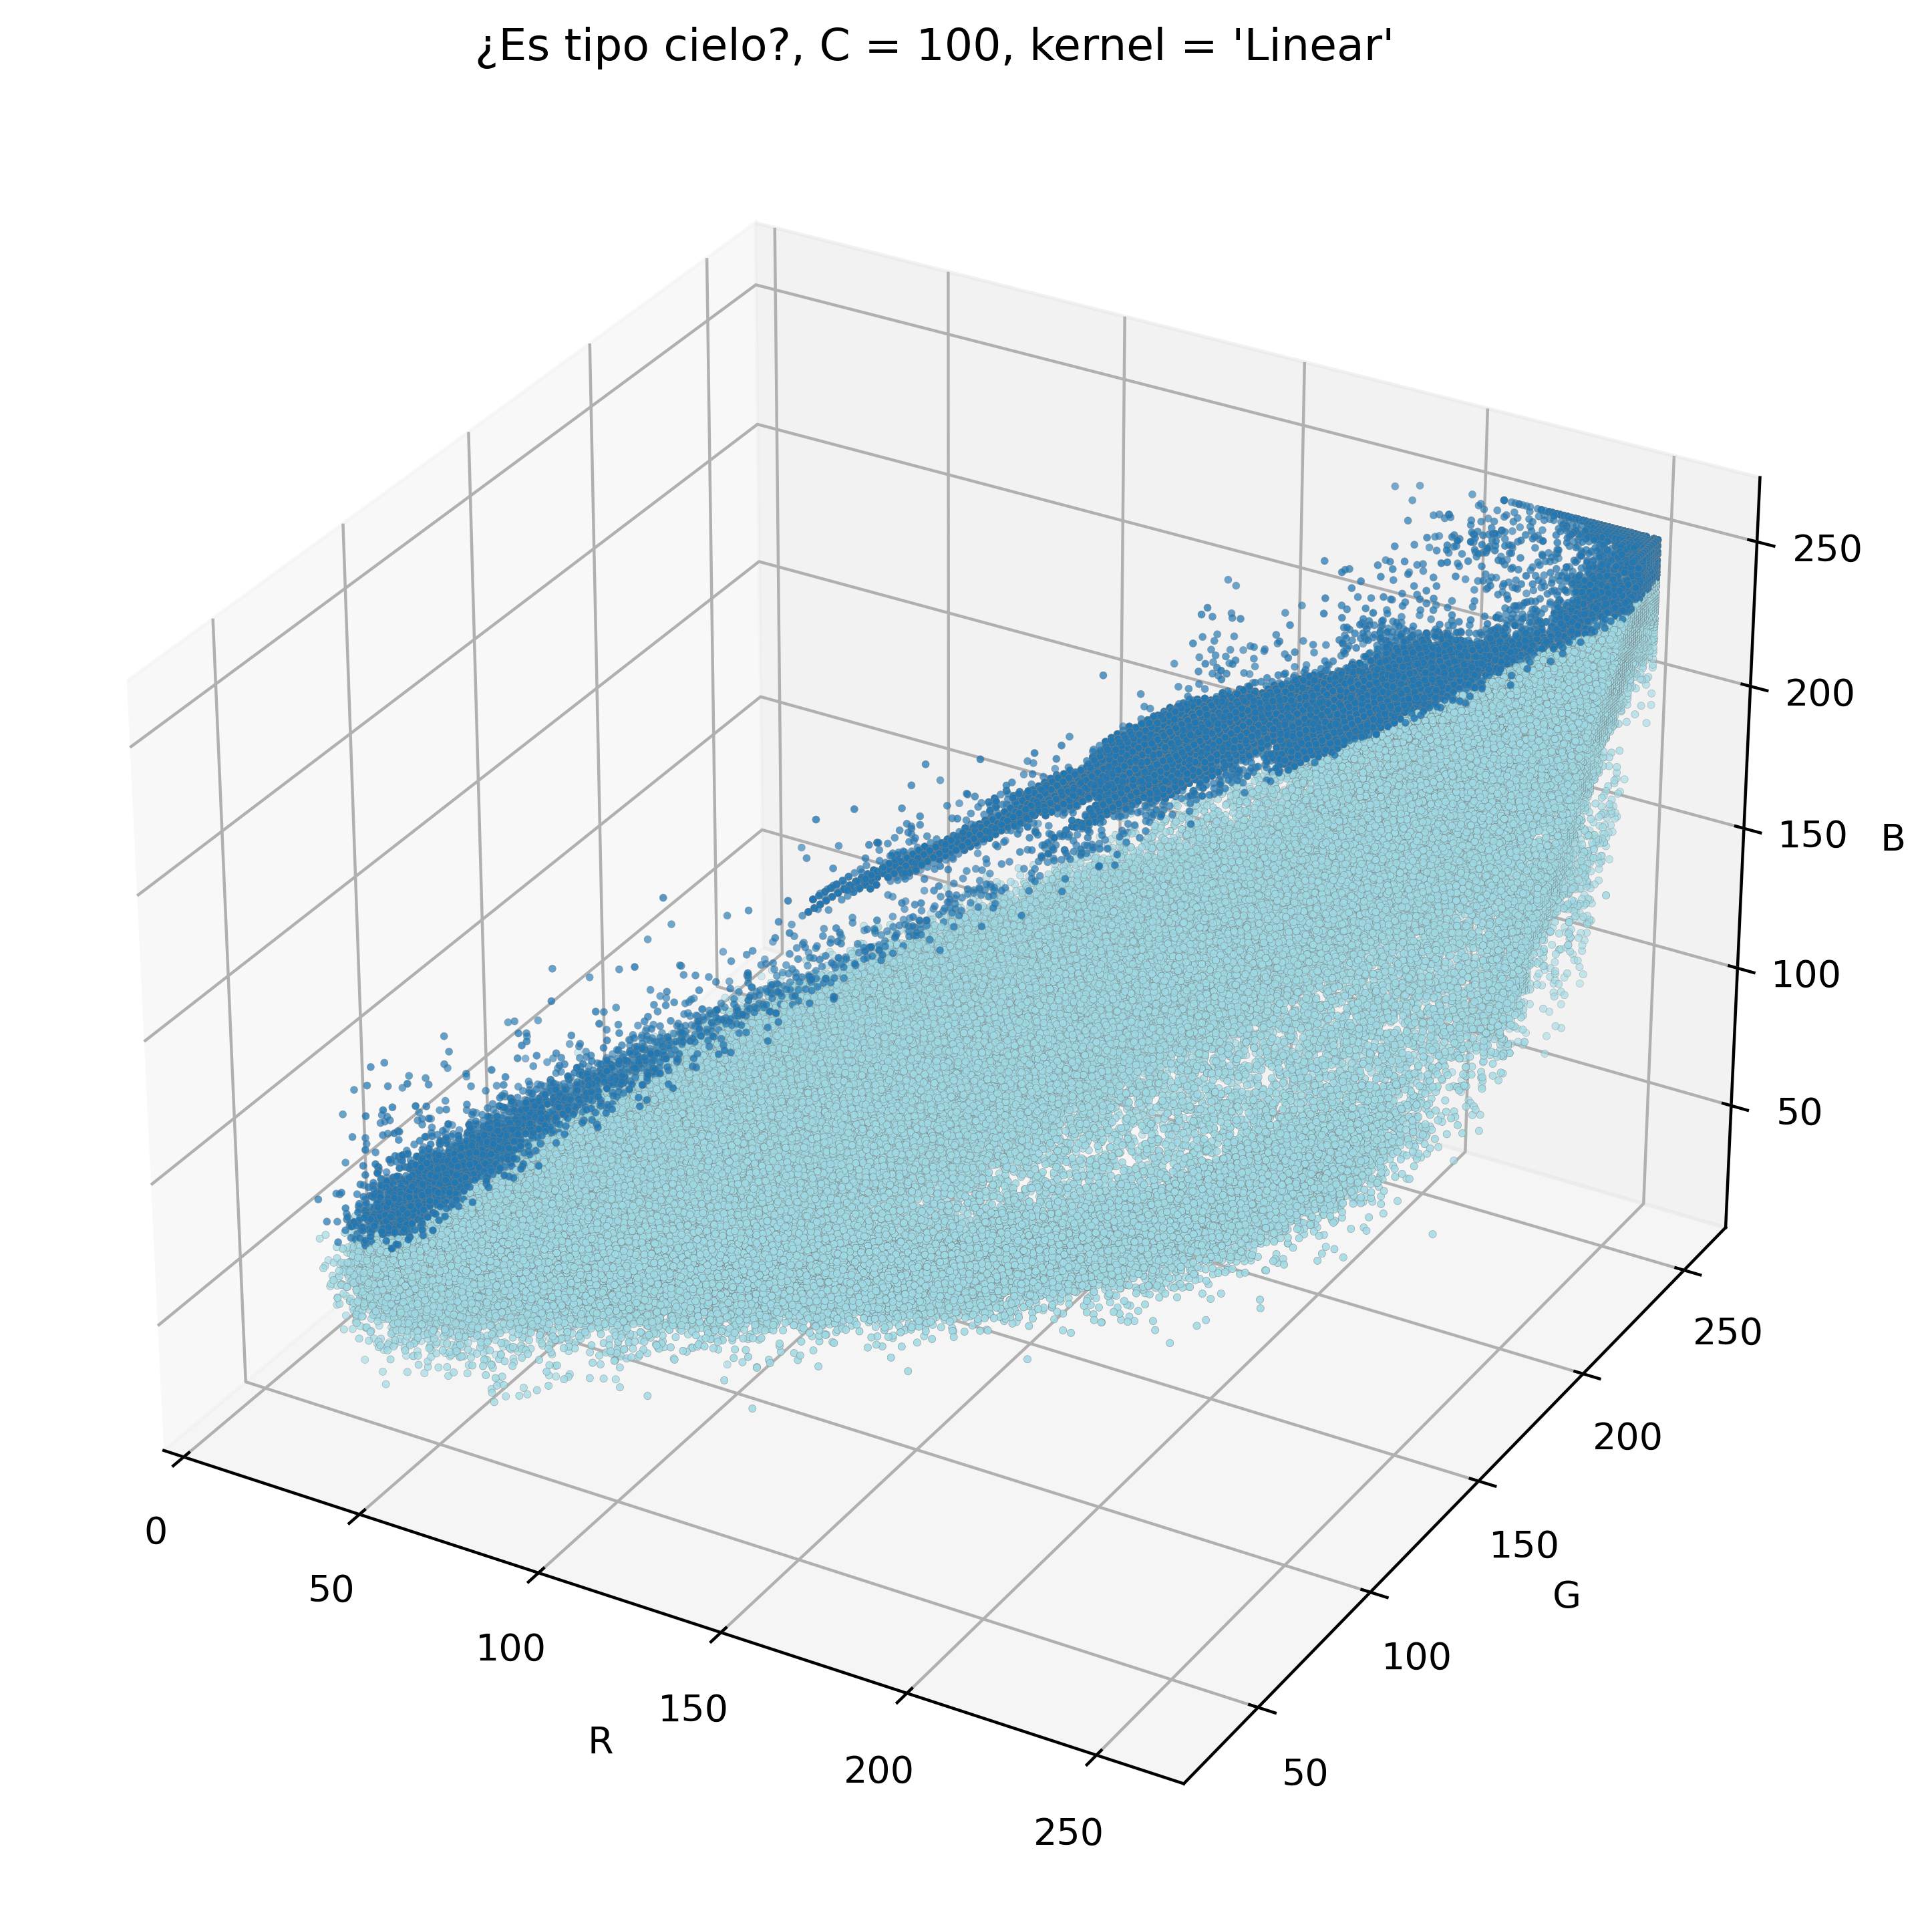

In [4]:
import matplotlib as plt
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

cielo = Image.open('cielo.jpg')
cieloA = np.array(cielo)
cieloM = np.reshape(cieloA,(-1,3))

pasto = Image.open('pasto.jpg')
pastoA = np.array(pasto)
pastoM = np.reshape(pastoA,(-1,3))

vaca = Image.open('vaca.jpg')
vacaA = np.array(vaca)
vacaM = np.reshape(vacaA,(-1,3))

cieloDF = pd.DataFrame(cieloM,columns=list('rgb'))
pastoDF = pd.DataFrame(pastoM,columns=list('rgb'))
vacaDF = pd.DataFrame(vacaM,columns=list('rgb'))

#carga de la imagen a clasificar
cow = Image.open('cow.jpg')
cowA = np.array(cow)
cowM = np.reshape(cowA,(-1,3))
cowDF = pd.DataFrame(cowM,columns=list('rgb'))

# ==============================================================================
#CLASIFICADOR CIELO
cieloDF = cieloDF.assign(Tipo=1)
pastoDF = pastoDF.assign(Tipo=2)
vacaDF = vacaDF.assign(Tipo=2)
dataset = cieloDF.append(pastoDF,ignore_index=True)
dataset = dataset.append(vacaDF,ignore_index=True)

# Preprocesado y modelado 
color = dataset.drop(columns = 'Tipo')
tipo = dataset['Tipo']

color_train, color_test, tipo_train, tipo_test = train_test_split(
                                        color,
                                        tipo,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo SVM lineal 
model = SVC(C = 100, kernel = 'linear' , random_state=123)
modelo1 = model.fit(color_train, tipo_train)

# Predicción valores grid
predicciones1 = modelo1.predict(cowDF)

# Creamos la figura
fig1 = plt.figure(figsize=(9,9),dpi=400)
ax1 = fig1.add_subplot( 111, projection='3d')

x = cowDF.r
y = cowDF.g
z = cowDF.b
ax1.scatter3D(x, y, z,
              c=predicciones1, marker='o',
              depthshade=True, s=4,
              cmap=plt.cm.tab20,
              edgecolors='gray',
              linewidth=0.1,)

ax1.set_title("¿Es tipo cielo?, C = 100, kernel = 'Linear'")
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
ax1.legend(predicciones1)
plt.show()





In [10]:
import collections
clasif1 = collections.Counter(predicciones1)
#print(np.count_nonzero(predicciones1 == 1))
clasif_cielo = (clasif1[1]/(clasif1[1]+clasif1[2]))*100
print('Porcentaje de pixeles clasificados como "cielo": ',clasif_cielo ,'%')

Porcentaje de pixeles clasificados como "cielo":  37.431902123730374 %


In [11]:
import matplotlib as plt
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

cielo = Image.open('cielo.jpg')
cieloA = np.array(cielo)
cieloM = np.reshape(cieloA,(-1,3))

pasto = Image.open('pasto.jpg')
pastoA = np.array(pasto)
pastoM = np.reshape(pastoA,(-1,3))

vaca = Image.open('vaca.jpg')
vacaA = np.array(vaca)
vacaM = np.reshape(vacaA,(-1,3))

cieloDF = pd.DataFrame(cieloM,columns=list('rgb'))
pastoDF = pd.DataFrame(pastoM,columns=list('rgb'))
vacaDF = pd.DataFrame(vacaM,columns=list('rgb'))

#carga de la imagen a clasificar
cow = Image.open('cow.jpg')
cowA = np.array(cow)
cowM = np.reshape(cowA,(-1,3))
cowDF = pd.DataFrame(cowM,columns=list('rgb'))

# ==============================================================================
#CLASIFICADOR PASTO
cieloDF = cieloDF.assign(Tipo=1)
pastoDF = pastoDF.assign(Tipo=2)
vacaDF = vacaDF.assign(Tipo=1)
dataset = cieloDF.append(pastoDF,ignore_index=True)
dataset = dataset.append(vacaDF,ignore_index=True)

# Preprocesado y modelado 
color = dataset.drop(columns = 'Tipo')
tipo = dataset['Tipo']

color_train, color_test, tipo_train, tipo_test = train_test_split(
                                        color,
                                        tipo,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo SVM lineal 
model2 = SVC(C = 100, kernel = 'linear' , random_state=123)
modelo2 = model2.fit(color_train, tipo_train)

# Predicción valores grid
predicciones2 = modelo2.predict(cowDF)

# Creamos la figura
fig2 = plt.figure(figsize=(9,9),dpi=400)
ax2 = fig2.add_subplot( 111, projection='3d')

x = cowDF.r
y = cowDF.g
z = cowDF.b
ax2.scatter3D(x, y, z,
              c=predicciones2, marker='o',
              depthshade=True, s=4,
              cmap=plt.cm.tab20,
              edgecolors='gray',
              linewidth=0.1,)

ax2.set_title("¿Es tipo pasto?, C = 100, kernel = 'Linear'", fontsize=15)
ax2.set_xlabel('R')
ax2.set_ylabel('G')
ax2.set_zlabel('B')
ax2.legend(predicciones2)
plt.show()


In [ ]:
import collections
clasif2 = collections.Counter(predicciones2)
#print(np.count_nonzero(predicciones1 == 1))
clasif_pasto = (clasif2[2]/(clasif2[1]+clasif2[2]))*100
print('Porcentaje de pixeles clasificados como "cielo": ',clasif_pasto ,'%')

In [ ]:
import matplotlib as plt
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

cielo = Image.open('cielo.jpg')
cieloA = np.array(cielo)
cieloM = np.reshape(cieloA,(-1,3))

pasto = Image.open('pasto.jpg')
pastoA = np.array(pasto)
pastoM = np.reshape(pastoA,(-1,3))

vaca = Image.open('vaca.jpg')
vacaA = np.array(vaca)
vacaM = np.reshape(vacaA,(-1,3))

cieloDF = pd.DataFrame(cieloM,columns=list('rgb'))
pastoDF = pd.DataFrame(pastoM,columns=list('rgb'))
vacaDF = pd.DataFrame(vacaM,columns=list('rgb'))

#carga de la imagen a clasificar
cow = Image.open('cow.jpg')
cowA = np.array(cow)
cowM = np.reshape(cowA,(-1,3))
cowDF = pd.DataFrame(cowM,columns=list('rgb'))

# ==============================================================================
#CLASIFICADOR VACA
cieloDF = cieloDF.assign(Tipo=1)
pastoDF = pastoDF.assign(Tipo=1)
vacaDF = vacaDF.assign(Tipo=3)
dataset = cieloDF.append(pastoDF,ignore_index=True)
dataset = dataset.append(vacaDF,ignore_index=True)

# Preprocesado y modelado 
color = dataset.drop(columns = 'Tipo')
tipo = dataset['Tipo']

color_train, color_test, tipo_train, tipo_test = train_test_split(
                                        color,
                                        tipo,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo SVM lineal 
model3 = SVC(C = 100, kernel = 'linear' , random_state=123)
modelo3 = model3.fit(color_train, tipo_train)

# Predicción valores grid
predicciones3 = modelo3.predict(cowDF)

# Creamos la figura
fig3 = plt.figure(figsize=(9,9),dpi=400)
ax3 = fig3.add_subplot( 111, projection='3d')

x = cowDF.r
y = cowDF.g
z = cowDF.b
ax3.scatter3D(x, y, z,
              c=predicciones3, marker='o',
              depthshade=True, s=4,
              cmap=plt.cm.tab20,
              edgecolors='gray',
              linewidth=0.1,)

ax3.set_title("¿Es tipo cielo?, C = 100, kernel = 'Linear'", fontsize=15)
ax3.set_xlabel('R')
ax3.set_ylabel('G')
ax3.set_zlabel('B')
ax2.legend(predicciones3)
plt.show()

import collections
clasif3 = collections.Counter(predicciones3)
#print(np.count_nonzero(predicciones1 == 1))
clasif_vaca = (clasif3[3]/(clasif3[3]+clasif3[1]))*100
print('Porcentaje de pixeles clasificados como "cielo": ',clasif_vaca ,'%')